In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 3})
sns.set_style('whitegrid',
              {'grid.linestyle': ':', 'grid.color': 'red', 'axes.edgecolor': '0.5',
               'axes.linewidth': 1.2, 'legend.frameon': True})

import os

import pickle

In [2]:
npart = 1000
nturns = 20000

In [3]:
tune_range_qx = np.arange(18.55, 18.95 + 0.01, 0.01)
tune_range_qy = tune_range_qx

e_seed = 1

In [4]:
losses = np.zeros((len(tune_range_qx), len(tune_range_qy)))
std_x = np.zeros_like(losses)
std_y = np.zeros_like(losses)

for i, qx in enumerate(tune_range_qx):
    for j, qy in enumerate(tune_range_qy):
        qqx, qqy = int(np.round((qx%1) * 100)), int(np.round((qy%1) * 100))

        filename_error_table = "./errors_{qqx}_{qqy}_{eseed:d}".format(
            qqx=qqx, qqy=qqy, eseed=e_seed)

        try:
            store = pickle.load(open(filename_error_table + '_summary.p', 'rb'))
        except FileNotFoundError:
            losses[i, j] = np.nan
            std_x[i, j] = np.nan
            std_y[i, j] = np.nan
            continue
        
        losses[i, j] = store['losses']
        std_x[i, j] = store['std_x']
        std_y[i, j] = store['std_y']

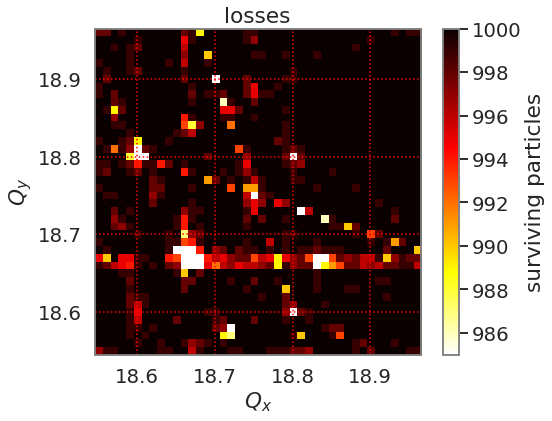

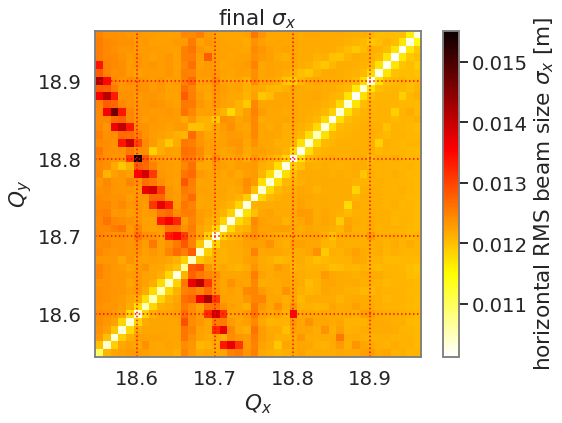

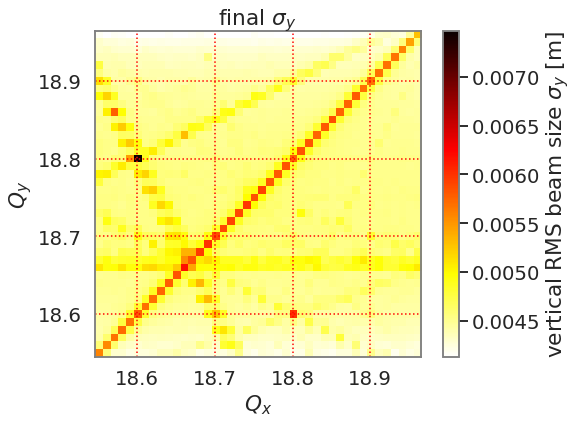

In [5]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    losses.T, origin='lower', vmin=985, 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('surviving particles')
plt.savefig('tunescan_eseed1_losses.pdf', bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_x$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_x.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('horizontal RMS beam size $\sigma_x$ [m]')
plt.savefig('tunescan_eseed1_sigx.pdf', bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_y$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_y.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('vertical RMS beam size $\sigma_y$ [m]')
plt.savefig('tunescan_eseed1_sigy.pdf', bbox_inches='tight')

### Vera's results

In [6]:
!head -1 Tunes_PartLeft_Set1.txt

In [7]:
vera_e_seed, vera_qx, vera_qy, vera_q1, vera_q2, vera_losses = np.genfromtxt(
    'Tunes_PartLeft_Set1.txt', skip_header=1, unpack=True)

In [8]:
vera_qx = 18 + np.unique(vera_qx) * 1e-2
vera_qy = 18 + np.unique(vera_qy) * 1e-2
vera_losses = vera_losses.reshape((len(vera_qx), len(vera_qy)))

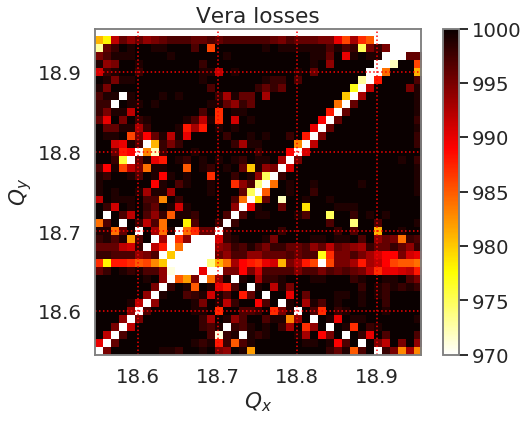

In [9]:
dqx, dqy = np.diff(vera_qx)[0], np.diff(vera_qy)[0]
extent = [
    vera_qx[0] - dqx/2., vera_qx[-1] + dqx/2.,
    vera_qy[0] - dqy/2., vera_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('Vera losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    vera_losses.T, origin='lower', vmin=970, 
    extent=extent, cmap=plt.get_cmap('hot_r'))
plt.colorbar()